# Analyse Gemiddeld 4

Wordt er in de eerste helft significant meer of minder gescoord dan in de tweede helft?

Bereken over alle seizoenen heen het totaal aantal goals in de eerste helft en in de tweede helft. 

Hou waar mogelijk géén rekening met goals in de toegevoegde tijd omdat dit een vertekend beeld zou kunnen geven.


In [2]:
# Importing the necessary packages
import pandas as pd
from scipy.stats import chisquare 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Laad de data
doelpunten_data = pd.read_csv(r"doelpunten.csv", sep=";")

Total goals in the first half: 17684
Total goals in the second half: 23276
Chi-square value: 763.4390625
P-value: 4.800647314194788e-168


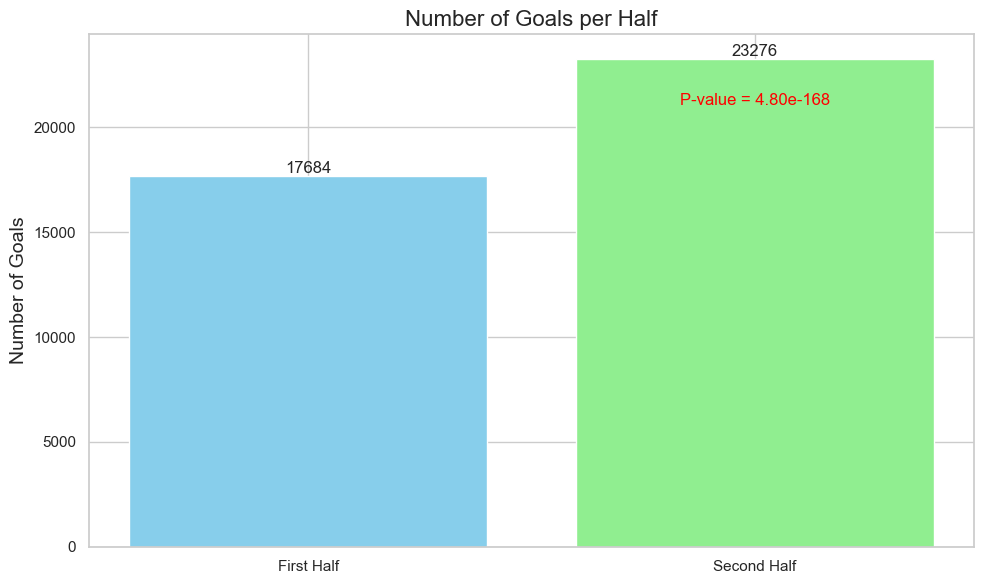

Conclusion: Significant difference in goal distribution between halves (reject H0).


In [4]:
# Doelpunten identificeren in de eerste en tweede helft
doelpunten_1e_helft = doelpunten_data[doelpunten_data['MinDoelpunt'] <= 45]
doelpunten_2e_helft = doelpunten_data.query('45 < MinDoelpunt <= 90')

# Totaal aantal doelpunten per helft berekenen
totals = [len(doelpunten_1e_helft), len(doelpunten_2e_helft)]

# Verwachte doelpunten aannemende een gelijke verdeling
expected_goals = [sum(totals) / 2] * 2

# Chi-kwadraat Goedheid van Fit test uitvoeren
chi2_stat, p_value = chisquare(f_obs=totals, f_exp=expected_goals)

# Resultaten uitvoeren
print(f"Totaal aantal doelpunten in de eerste helft: {totals[0]}")
print(f"Totaal aantal doelpunten in de tweede helft: {totals[1]}")
print(f"Chi-kwadraat waarde: {chi2_stat}")
print(f"P-waarde: {p_value}")

# Plot instellingen met seaborn
sns.set(style="whitegrid")
labels = ['Eerste Helft', 'Tweede Helft']
kleuren = ['lichtblauw', 'lichtgroen']

# Staafdiagram maken
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, totals, color=kleuren)
plt.title('Aantal Doelpunten per Helft', fontsize=16)
plt.ylabel('Aantal Doelpunten', fontsize=14)

# Bars annoteren met doelpuntentellingen
for bar in bars:
    hoogte = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, hoogte, int(hoogte), va='bottom', ha='center', fontsize=12)

# Plot annoteren met p-waarde
plt.text(1, max(totals) - max(totals)/10, f'P-waarde = {p_value:.2e}', ha='center', va='bottom', fontsize=12, color='red')

plt.tight_layout()
plt.show()

# Conclusie op basis van de chi-kwadraat test
if p_value < 0.05:
    print("Conclusie: Significant verschil in doelpuntenverdeling tussen de helften (verwerp H0).")
else:
    print("Conclusie: Geen significant verschil in doelpuntenverdeling tussen de helften (H0 niet verwerpen).")